Finding the document similarity using TF-IDF

In [ ]:
!ls

data2.csv  onlyagri.csv  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Note the documents should be of limited time-frames

# Import pandas
import pandas as pd
 
# reading csv file
# data_df = pd.read_csv("/content/drive/MyDrive/Final_classification_code /TF_IDF_similarity/onlyagri.csv")
data_df = pd.read_csv("/content/onlyagri.csv")
data_df = data_df.dropna(subset=['NewsArticleID', 'NewsArticleText'])  # drop the rows which have null values

In [ ]:
data_dictionary = {}
for index, row in data_df.iterrows():
    data_dictionary[row['NewsArticleID']] = row['NewsArticleText']

## Preprocess Text

In [ ]:
import re

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

def lowerText(text):
  text = text.lower()
  return text

def removePunctuation(string): 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 
    return string

def removeNumbers(text):
  input_str = re.sub(r'\d+', "", text)
  return input_str


def removeWhitespace(input_str):
    # To remove leading and ending spaces, you can use the strip() function
    input_str = input_str.strip()

    return input_str


def removeStopwords(text):
  stop_words = set(stopwords.words('english'))
  tokens = word_tokenize(text)
  result = [i for i in tokens if not i in stop_words]
  return " ".join(result)


def lemmatization(text):
  tokens = []
  lemmatizer=WordNetLemmatizer()
  input_str=word_tokenize(text)
  for word in input_str:
      tokens.append(lemmatizer.lemmatize(word))
  return " ".join(tokens)


def preprocess_text(text):
    text = lowerText(text)
    text = removePunctuation(text)
    text = removeNumbers(text)
    text = removeWhitespace(text)
    text = removeStopwords(text)
    text = lemmatization(text)
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
document_ids = []
document_list_processed = []

for key in data_dictionary:
    text = data_dictionary[key]
    document_ids.append(key)
    document_list_processed.append(preprocess_text(text))

## Generate TF-IDF matrix

You can tune the hyperparamters: 

max_df: [0, 1]

min_df: [0, 1]

max_features: Length of the vector (must be integer)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.1, max_features=1000, stop_words='english')
X = vectorizer.fit_transform(document_list_processed)

print(X.shape, type(X))

(965, 427) <class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
# For visualising the matrix
feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,ability,able,access,according,account,act,action,activity,added,addition,...,week,welfare,west,wheat,woman,work,working,world,year,yield
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.106794,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.091900,0.0,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.040169,0.0,...,0.103582,0.000000,0.109877,0.0,0.00000,0.000000,0.000000,0.0,0.094327,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.00000,0.616712,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0
961,0.0,0.105525,0.0,0.153252,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.12068,0.000000,0.000000,0.0,0.051955,0.0
962,0.0,0.000000,0.0,0.000000,0.0,0.051214,0.0,0.0,0.000000,0.0,...,0.000000,0.105218,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0
963,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.088634,0.0,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0


## Check Similarity

In [ ]:
query_text = """ 

They blame lack of remuneration, rising input costs and accumulating debt

Andhra Pradesh has received around 20 per cent more rainfall than is normal for this time of the year, according to the state weather department. The state’s reservoirs have enough water now. However, kharif crop coverage in the state is down, according to government data. Worse, farmers are refusing to cultivate and are considering other vocations.

The weekly kharif crop coverage report released by the Commissionerate of Agriculture showed that crops like paddy, sorghum, fox-tailed millet, red gram, green gram, black gram and chilli peppers are down 25 per cent.

The acreage for pearl millet, maize, groundnut, castor, onion, turmeric and sugarcane is between 26 per cent and 50 per cent. Acreage under cotton is 51 per cent and 75 per cent and sunflower 76 per cent and 100 per cent.

Farmers across the state told this reporter that the lack of remunerative prices, rising input costs as well as accumulating debt was making them disenchanted with agriculture.

A prominent agricultural expert noted that farmers had been suffering ever since united Andhra Pradesh was bifurcated in the last decade. The main reason, he said, was faulty government policies.

Vocational changes

R Mallikarjuna Reddy from Gopulapuram revenue village in the Duvvuru mandal (headed by a tehsildar) of YSR Kadapa district, has left farming, having lost hope.

“I sold 1.21 hectares of my land to pay debts over the last three years and have Rs five lakhs in debt still. I am not willing to take up paddy cultivation again even on a tenancy basis and have become a mason now in the near-by Proddatur town,” he told this reporter.

Gopulapuram is irrigated by the KC canal and gets assured water for one crop from the Srisailam dam around August.

Mallikarjuna’s fellow villager M Pratap Reddy incurred a Rs 60 lakh debt in farming. He said, “The endowment land of seven acres I used to cultivate for Rs 1 lakh tenancy has now been taken for Rs 46,000 per year. I now hear tenant farmers asking for investment from land owners to take up farming.”

C Varadarajulu Reddy, another farmer who sold 0.6 hectacres of his land and used to cultivate 16.2 hectares of leased land, has pinned hope on dairy farming.

He said he might take up cultivation only on his left-over land of 2.42 hectares to get fodder for dairy cattle.

Tenancy in AP is the highest in the country and is pegged at 42.4 per cent according the 77th Round Survey of the National Sample Survey Office (NSSO), 2019. Sustaining viability of farming for tenant farmers against this backdrop attains added significance in the state.

Other farmers have not changed vocations. But, they have changed crops.

S Fakruddin, a farmer from Kadivella village of Yemmiganur mandal in Kurnool district has taken up cotton cultivation, given the minimum guarantee it gives over other crops.

B Suresh Babu, a farmer from Kanumuru village, in Pamarru mandal of Krishna district, who claimed he had cultivated 28-32 hectares (Eight hectares of his own and the rest leased land) for the last 40 years, had now restricted himself to his own land.

“The cost of labour has shot up from a third of the input cost to 50 per cent now. But the labour is also not happy as prices of all commodities have risen.

“Recently, we had tenant farmers from the adjacent NTR district, who cultivated chillies, come as labourers to pay the lease amount to land owners. Major chilli-growing areas had lost the crop to thrips, an invasive species of pest,” he added.

Investment for even vegetable crops like cucumber, ridge gourd and bottle gourd has become more now as they too have been hit by diseases, the farmer added.

The farmers are not mulling a crop holiday like their counterparts in the Konaseema district.

M Satyanarayana, a farmer from Pedamuttevi village of Mouvva mandal in Krishna district owns 0.8 hectares and has taken 3.23 hectares on tenancy, said:

There is no crop holiday here. While the governments gloat over giving us Rs 13,500 for a year I lost nearly Rs one lakh as I received only Rs 1,250 per 75 kg paddy bag while the minimum support price is Rs 1,550.

Seed and fertiliser dealers in the Sodam mandal of Chittoor district rue the lack of sales. When the price of tomatoes increased to Rs 70 a kg in March and April this year, the government intervened to provide relief to consumers.

It is turning a blind eye when tomatoes sell at Rs 7 per kg, they say. In such a situation, how will farmers take up cultivation, they ask.

GV Ramanjaneyulu, executive director, Centre for Sustainable Agriculture based in Hyderabad blamed the situation on the policies adopted by successive state governments.

“This is courtesy falling investment of governments in agriculture to improve productivity. This is happening since the division of the state.

“Successive governments have not made much difference in improving overall agriculture. This calls for a significant shift in the agricultural policy support to the farmers,” he added.

Normal Monsoon

The state weather department has characterised the southwest monsoon in AP as ‘normal’.

The monsoon, which had to enter AP June 1, set in June 13, 2022 and advanced over some parts of coastal AP June 15. It covered the entire state by June 20.

AP has received 238.3 millimetres (mm) of rain, compared to a normal of 199.3 mm for this time of the year.

Of the 26 districts in the state, East Godavari and West Godavari metrological sub divisions received an excess rain of 62 and 52 per cent respectively.

Stella, the director of the India Metrological Department of AP, told this reporter that a departure of minus 19 to plus 19 per cent from normal rainfall was usually considered normal.

“The damage to crops cannot be deduced depending on just the rains. Additional factors like flood water from upper riparian states could also affect.

“Low-lying areas could be affected more. So, the minus 14 per cent rain in Vishakhapatnam and minus four percent rain in Kurnool are considered normal,” she said.

Water levels in major reservoirs of the state were 568.12 billion cubic feet (tmc) as on July 20, 2022. They had stood at 413.22 tmc last year on the corresponding date.
 """

# New Section

In [ ]:
query_text_preprocessed = preprocess_text(query_text)

In [ ]:
query_text_preprocessed

'blame lack remuneration rising input cost accumulating debt andhra pradesh received around per cent rainfall normal time year according state weather department state ’ reservoir enough water however kharif crop coverage state according government data worse farmer refusing cultivate considering vocation weekly kharif crop coverage report released commissionerate agriculture showed crop like paddy sorghum foxtailed millet red gram green gram black gram chilli pepper per cent acreage pearl millet maize groundnut castor onion turmeric sugarcane per cent per cent acreage cotton per cent per cent sunflower per cent per cent farmer across state told reporter lack remunerative price rising input cost well accumulating debt making disenchanted agriculture prominent agricultural expert noted farmer suffering ever since united andhra pradesh bifurcated last decade main reason said faulty government policy vocational change r mallikarjuna reddy gopulapuram revenue village duvvuru mandal headed 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

## Calculate the similarity for each of the documents

query_vector = vectorizer.transform([query_text_preprocessed])
# Calculate the cosine similarity between the vector of each document and the query vector
results = cosine_similarity(X, query_vector)
results.shape

(965, 1)

In [ ]:
# Tune the threshold according to the similarity you want in the article
# The similarity scores will be in the range [0, 1]
THRESHOLD = 0.6

similar_articles_index = []
for i, sim_score in enumerate(results):
    if sim_score > THRESHOLD:
        print(sim_score)
        similar_articles_index.append(i)

[1.]
[0.60417826]


In [ ]:
# df_test = pd.read_csv("/content/drive/MyDrive/Final_classification_code /TF_IDF_similarity/data2.csv", encoding='cp1252')
df_test = pd.read_csv("/content/data2.csv", encoding='cp1252')

df_test

,NewsArticleID,NewsArticleTitle,NewsArticleText,label
0,2,Ministry of Agriculture & Farmers Welfare (MoA...,"The Ministry of Agriculture & Farmers Welfare,...",1
1,12,"India safeguarding farm subsidy, says Agri min...",Union Minister for Agriculture Narendra Tomar ...,1
2,15,Govt efforts to double farmers' income\nyielde...,NEW DELHI: The government's efforts to double ...,1
3,25,"Canada, Saskatchewan Invest $17.6M in Crop Res...",Canada’s Minister of Agriculture and Agri-Food...,1
4,35,Budget 2023 gives Rs 968cr digitisation boost ...,"The government proposes to spend ?1,150.38 cro...",1
5,37,Farmer dies in tiger attack in Wayanad,\nA 50 -year-old farmer died after being attac...,1
6,51,"Farmer suicides reduced in Telangana, Centre t...",HYDERABAD: Union Agriculture Minister Narendra...,1
7,54,"Maharashtra: 1,023 Farmers Died By Suicide In ...","The Marathwada area of Maharashtra recorded 1,...",1
8,71,Hyderabad: Farmer’s family of five tries commi...,"Hyderabad: A farmer, along with his wife and t...",1
9,75,Pune: Farmer commits suicide due to harrasment...,"Due to moneylender pressure, a farmer committe...",1


In [ ]:
x_test = df_test['NewsArticleText'].tolist()
y_test = df_test['label'].tolist()

In [ ]:
print(f"Test data: {len(x_test)}")

Test data: 59


In [ ]:
from tqdm import tqdm

THRESHOLD = 0.6

def get_prediction(x_test, threshold=THRESHOLD):
    # function to get the accuracy of the model
    y_pred = []
    for query_text in tqdm(x_test):
        query_text_preprocessed = preprocess_text(query_text)
        query_vector = vectorizer.transform([query_text_preprocessed])
        # Calculate the cosine similarity between the vector of each document and the query vector
        results = cosine_similarity(X, query_vector)
        

        similar_articles_index = []
        for i, sim_score in enumerate(results):
            if sim_score > threshold:
                similar_articles_index.append(i)
        
        if len(similar_articles_index) > 0:
            # Similar article found on the database
            y_pred.append(1)
        else:
            # Not Similar
            y_pred.append(0)

    return y_pred

In [ ]:
y_pred = get_prediction(x_test)

100%|██████████| 59/59 [00:00<00:00, 155.36it/s]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_true = y_test
y_pred = y_pred
target_names = ['Non-Similar', 'Similar']
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

 Non-Similar       0.76      0.93      0.84        30
     Similar       0.91      0.69      0.78        29

    accuracy                           0.81        59
   macro avg       0.83      0.81      0.81        59
weighted avg       0.83      0.81      0.81        59

[[28  2]
 [ 9 20]]
0.8135593220338984


In [ ]:
import numpy as np

thresholds = np.arange(start=0.5, stop=1, step=0.01)
accuracies = []
for th in thresholds:
    y_pred = get_prediction(x_test, threshold=th)
    accuracies.append(accuracy_score(y_true, y_pred))

100%|██████████| 59/59 [00:00<00:00, 142.53it/s]


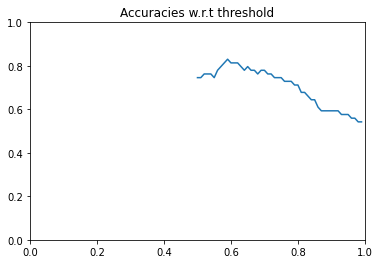

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

	
	
# create random data
xdata = thresholds
ydata = accuracies
plt.plot(xdata, ydata, color ='tab:blue')
	
# set the limits
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.title('Accuracies w.r.t threshold')
	
# display the plot
plt.show()

### Sentence BERT

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')
# model = SentenceTransformer('all-distilroberta-v1')

In [ ]:
document_list = []

for key in data_dictionary:
    text = data_dictionary[key]
    # text = preprocess_text(text)    # preprocess the text
    document_list.append(text)

embeddings_ques = model.encode(document_list, show_progress_bar = True, convert_to_tensor=True)

Batches:   0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
def get_prediction_transformer(x_test, threshold=0.75):
    """
        returns the answer from the database based on query
    """
   
    #Compute embeddings
    y_pred = []
    for query in tqdm(x_test):
        # query = preprocess_text(query)  # preprocess the text
        embedding_query = model.encode(query, convert_to_tensor=True)

        #Compute cosine-similarities for each sentence with each other sentence
        cosine_scores = util.cos_sim(embeddings_ques, embedding_query)
        results = cosine_scores.reshape(1, -1)
        results = results.cpu()
        res_index = np.argmax(results[0]).item()
       
        
        if results[0][res_index] > threshold:
            # Respective question found on the database
            y_pred.append(1)
        else:
            y_pred.append(0)

    return y_pred

In [ ]:
y_pred = get_prediction_transformer(x_test)

100%|██████████| 59/59 [00:00<00:00, 66.44it/s]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_true = y_test
y_pred = y_pred
target_names = ['Non-Similar', 'Similar']
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

 Non-Similar       0.86      0.83      0.85        30
     Similar       0.83      0.86      0.85        29

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59

[[25  5]
 [ 4 25]]
0.847457627118644


In [ ]:
import numpy as np

thresholds = np.arange(start=0.5, stop=1, step=0.01)
accuracies = []
for th in thresholds:
    y_pred = get_prediction_transformer(x_test, threshold=th)
    accuracies.append(accuracy_score(y_true, y_pred))

100%|██████████| 59/59 [00:02<00:00, 27.77it/s]


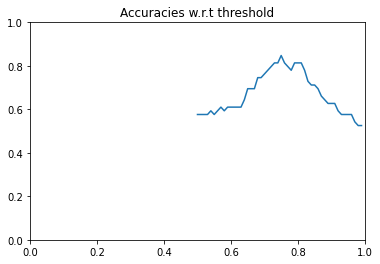

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

	
	
# create random data
xdata = thresholds
ydata = accuracies
plt.plot(xdata, ydata, color ='tab:blue')
	
# set the limits
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.title('Accuracies w.r.t threshold')
	
# display the plot
plt.show()

In [ ]:
thresholds[np.argmax(accuracies)]

0.7500000000000002

### Cross-Encoders

In [ ]:
from sentence_transformers import CrossEncoder

# model = CrossEncoder('cross-encoder/stsb-distilroberta-base', max_length=512)
model = CrossEncoder('cross-encoder/stsb-TinyBERT-L-4', max_length=512)

In [ ]:
# scores = model.predict([('Query1', 'Paragraph1'), ('Query1', 'Paragraph2')])

#For Example
scores = model.predict([('How many people live in Berlin?', 'Berlin had a population of 3,520,031 registered inhabitants in an area of 891.82 square kilometers.'), 
                        ('How many people live in Berlin?', 'Berlin is well known for its museums.')])

In [ ]:
scores

array([0.3735999 , 0.31690884], dtype=float32)

In [ ]:
document_list = []

for key in data_dictionary:
    text = data_dictionary[key]
    # text = preprocess_text(text)    # preprocess the text
    document_list.append(text)

In [ ]:
def get_prediction_cross(x_test, threshold=0.75):
    """
        returns the answer from the database based on query
    """
   
    #Compute embeddings
    y_pred = []
    for query in tqdm(x_test):
        # query = preprocess_text(query)  # preprocess the text
        pairs = []
        for text in document_list:
            pairs.append((query, text))

        results = model.predict(pairs)
        res_index = np.argmax(results).item()
       
        
        if results[res_index] > threshold:
            # Respective question found on the database
            y_pred.append(1)
        else:
            y_pred.append(0)

    return y_pred

In [ ]:
y_pred = get_prediction_cross(x_test)

100%|██████████| 59/59 [05:22<00:00,  5.46s/it]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_true = y_test
y_pred = y_pred
target_names = ['Non-Similar', 'Similar']
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

 Non-Similar       0.52      0.73      0.61        30
     Similar       0.53      0.31      0.39        29

    accuracy                           0.53        59
   macro avg       0.53      0.52      0.50        59
weighted avg       0.53      0.53      0.50        59

[[22  8]
 [20  9]]
0.5254237288135594


In [ ]:
import numpy as np

thresholds = np.arange(start=0.5, stop=1, step=0.01)
accuracies = []
for th in thresholds:
    y_pred = get_prediction_transformer(x_test, threshold=th)
    accuracies.append(accuracy_score(y_true, y_pred))

NameError: ignored

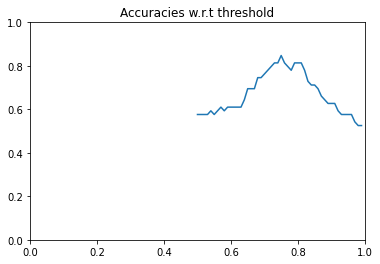

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

	
	
# create random data
xdata = thresholds
ydata = accuracies
plt.plot(xdata, ydata, color ='tab:blue')
	
# set the limits
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.title('Accuracies w.r.t threshold')
	
# display the plot
plt.show()